# 데이터의 이해
- 데이터의 종류: 정형/비정형/반정형
- 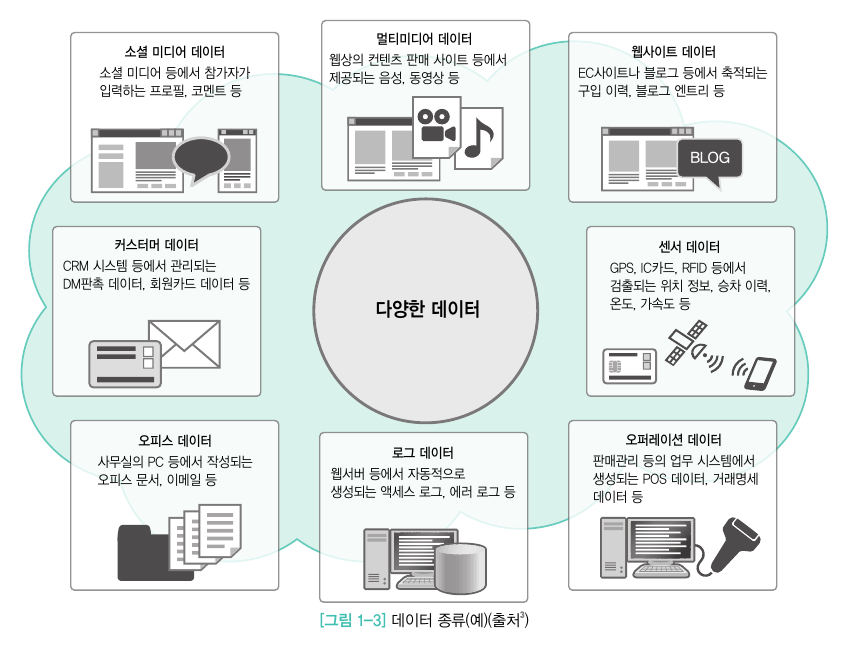

- 2021년 데이터 분석에 가장 수요가 많은 프로그램
- The Most In-Demand Skills for Data Scientists in 2021
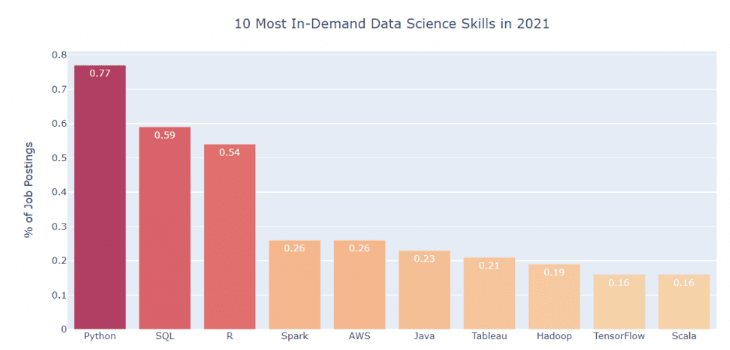

- 데이터 분석 프로젝트 단계
1. 비즈니스 이해 -> 2. 데이터 이해 -> 3. 데이터 준비 -> 4. 모델 작성 -> 평가 -> 공유/배포
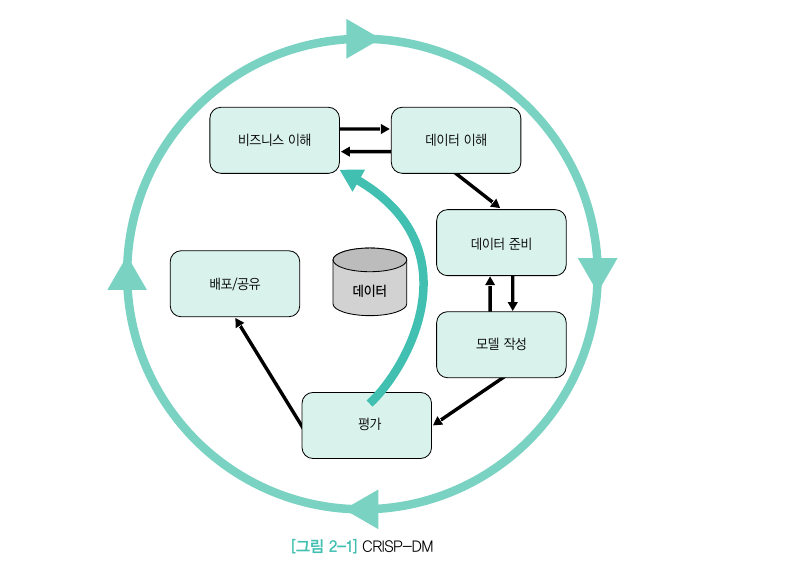

## 정형 데이터 전처리
- 목표: 데이터 분석을 통해 계약 가능성 높은 고객 찾아내기
- data: bank.csv
- 속성 항목
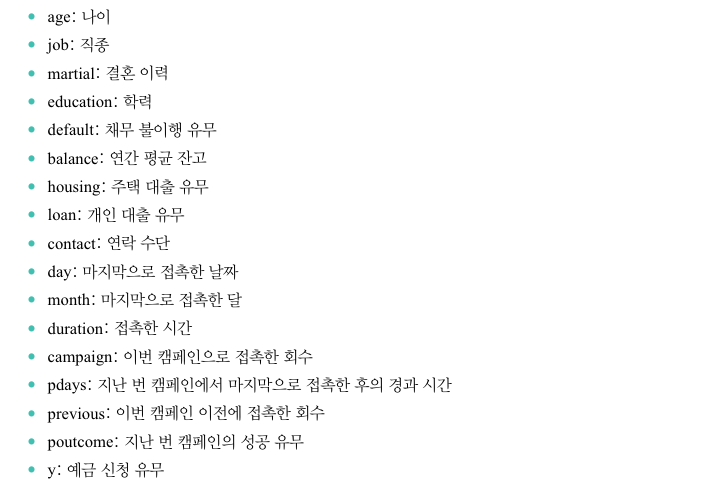

- 데이터 분석 관점
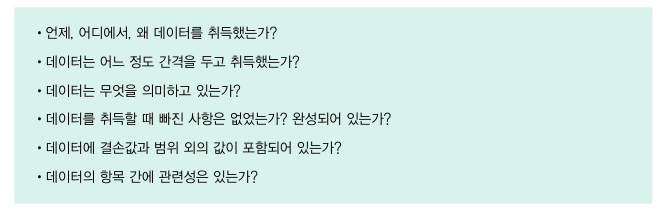

### 1. pandas 모듈을 이용해 데이터 읽기 및 확인하기

In [3]:
# Pandas 모듈 연결
import pandas as pd

# 파일 읽어오기
bank_df = pd.read_csv("./bank.csv", sep=",")

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [4]:
# 마지막에서 10행전까지 표시
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [5]:
# 데이터의 행수, 열수를 확인
print(bark_df.shape)

(7234, 17)


In [6]:
# 데이터 형을 확인
print(bark_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


### 2. 결손값의 확인

In [7]:
# 결손값 => 결측지(NaN) 갯수 확인
print(bark_df.isna().sum())

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [9]:
# 데이터 결손값 위치 확인
print(bark_df.isnull())

        age    job  marital  education  default  balance  housing   loan  \
0     False  False    False      False    False    False    False  False   
1     False  False    False      False    False    False    False  False   
2     False  False    False      False    False    False    False  False   
3     False  False    False      False    False    False    False  False   
4     False  False    False      False    False    False    False  False   
...     ...    ...      ...        ...      ...      ...      ...    ...   
7229  False  False    False      False    False    False    False  False   
7230  False  False    False      False    False    False    False  False   
7231  False  False    False      False    False    False    False  False   
7232  False  False    False      False    False    False    False  False   
7233  False  False    False      False    False    False    False  False   

      contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        

In [11]:
# 데이터행에 결손값이 포함되어 있는가?
print(bark_df.isnull().any(axis=1))

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool


In [12]:
# 데이터열에 결소값이 포함되어 있는가?
print(bark_df.isnull().any(axis=0))

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [13]:
# 데이터행별 결손값의 갯수
print('====== 데이터행별 결손값 ======')
print(bark_df.isnull().sum(axis=1), "\n")

# 데이터열별 결손값의 갯수
print('====== 데이터열별 결손값 ======')
print(bark_df.isnull().sum(axis=0))
# print(bark_df.isna().sum())

====== 데이터행별 결손값 ======
0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64 

====== 데이터열별 결손값 ======
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [15]:
# 데이터행별 결손값의 갯수가 많은 순서로 정렬(내림차순 정렬)
print(bark_df.isnull().sum(axis=1).sort_values(ascending=False))

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64


### 3. 통계량의 계산

In [16]:
# 데이터형이 숫자인 각종 통계량의 계산
bark_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


- 대표 통계량

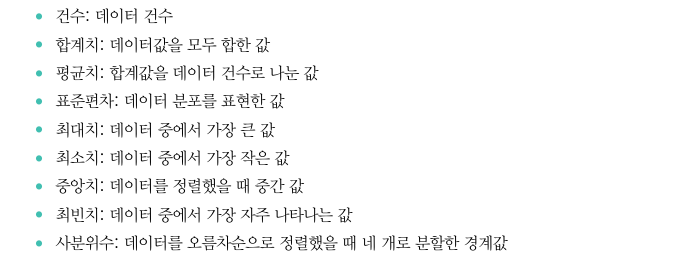

- 중앙값과 최빈치는 특이값(이상치)에 영향을 받지 않음
- (예: 가정 연소득을 계산할때 고위소득층/저위소득층을 제외)


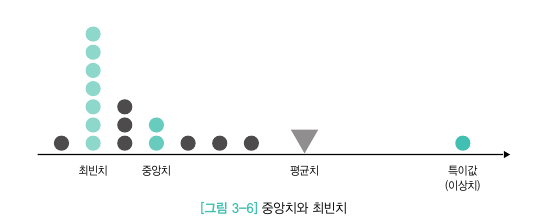

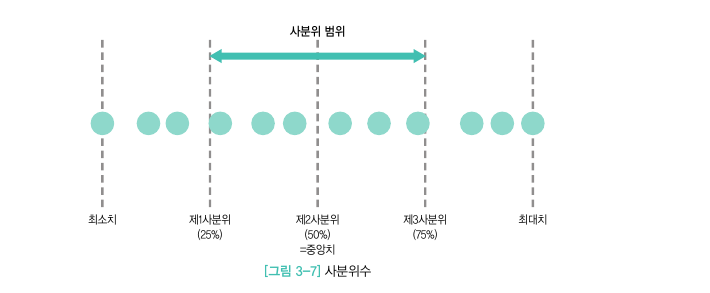

In [17]:
# 데이터형이 문자열인 각종 통계량의 계산
bark_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


### 4. 데이터의 가시화１

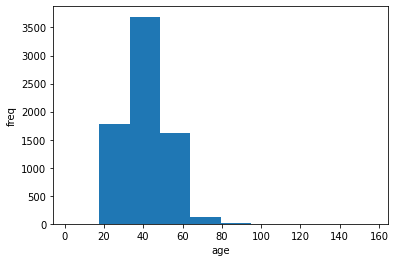

In [20]:
# 모듈 연결
import matplotlib.pyplot as plt
%matplotlib inline

# age의 히스토그램을 작성
plt.hist(bank_df['age'])

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

- 히스토그램: 도수분포표를 시각적으로 표현한 그래프

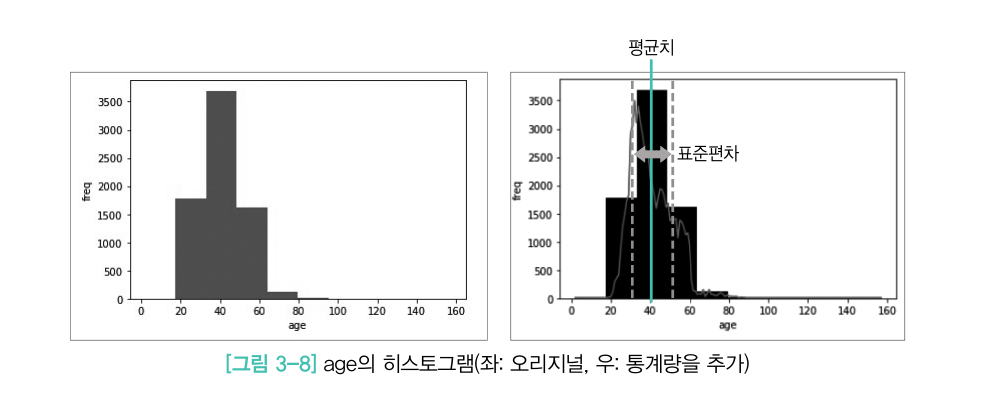

- 숫치 항목에 대한 히스토그램 작성

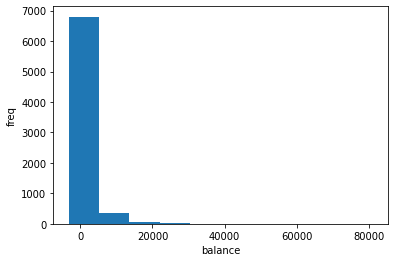

In [21]:
# balance의 히스토그램
plt.hist(bank_df['balance'])

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

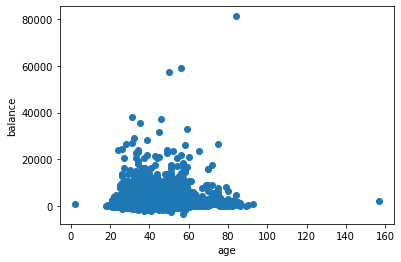

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [24]:
# age와 balance의 산포도를 작성
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

# age와 balance의 상관계수
bank_df[['age', 'balance']].corr()

- 상관계수: -1 ~ 1 사이의 값을 취하며 절대값이 크면 클수록 두 항목의 관련성이 강함

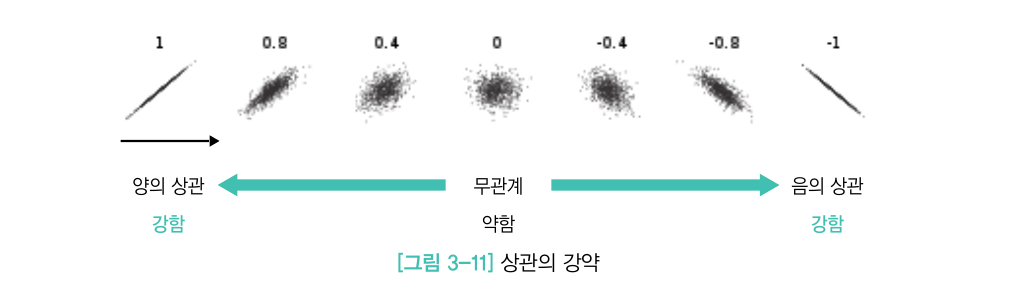

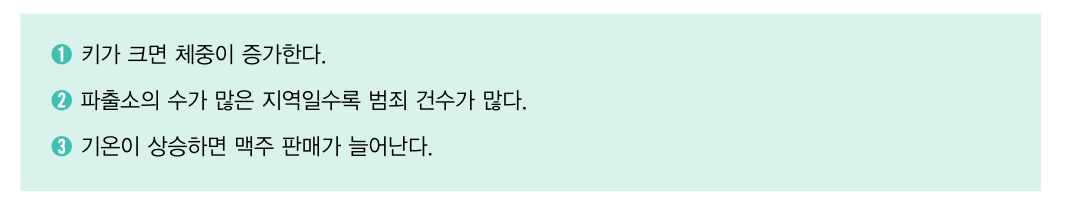

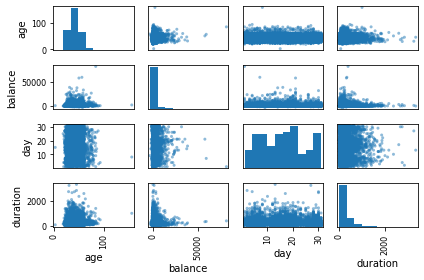

,age,balance,day,duration
age,1.000000,0.112364,-0.015818,0.006794
balance,0.112364,1.000000,0.011404,0.009340
day,-0.015818,0.011404,1.000000,-0.031867
duration,0.006794,0.009340,-0.031867,1.000000


In [28]:
# 산포도행렬의 작성
pd.plotting.scatter_matrix(bank_df[['age', 'balance', 'day', 'duration']])
plt.tight_layout()
plt.show()

# 'age', 'balance', 'day', 'duration'에 대한 상관도
bank_df[['age', 'balance', 'day', 'duration']].corr()

#### 원 그래프 작성하기
- 문자형 자료에 대한 비율

In [43]:
# job값의 비율을 계산(management 데이터 갯수/전체 데이터 갯수)
job_u = bank_df['job'].unique()
print(job_u)
display(bank_df.groupby('job')[['age']].count()/len(bank_df))
print()
print(bank_df['job'].value_counts(ascending=False, normalize=True))

['management' 'technician' 'blue-collar' 'retired' 'services' 'admin.'
 'entrepreneur' 'self-employed' 'unemployed' 'student' nan 'housemaid']


,age
job,
admin.,0.115289
blue-collar,0.207216
entrepreneur,0.033038
housemaid,0.028753
management,0.215648
retired,0.048521
self-employed,0.035388
services,0.091374
student,0.021150



management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


<class 'pandas.core.series.Series'>
Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student'],
      dtype='object')
[0.21696801 0.20848401 0.16773296 0.11599444 0.09193324 0.0488178
 0.03560501 0.03324061 0.0310153  0.02892907 0.02127955]


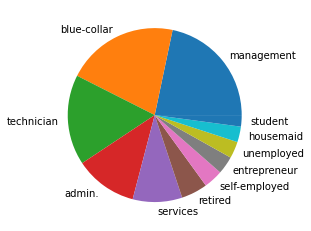

In [50]:
job_nor=bank_df['job'].value_counts(ascending=False, normalize=True)
print(type(job_nor))

# job값의 레이블
print(job_nor.index)

# job의 값
print(job_nor.values)

# job의 원그래프를 작성
plt.pie(job_nor.values, labels=job_nor.index)
plt.show()

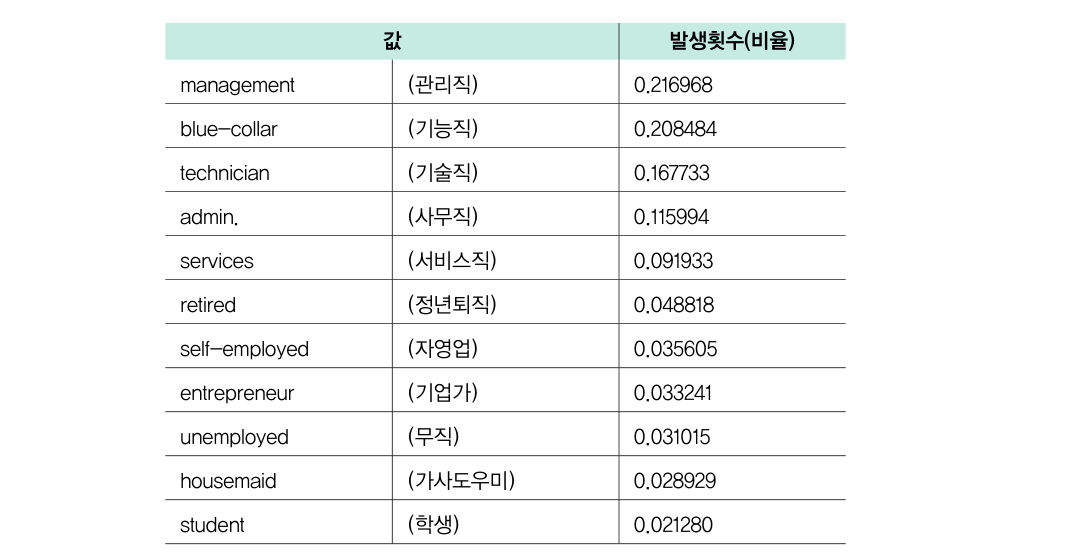

married     0.600359
single      0.284766
divorced    0.114874
Name: marital, dtype: float64


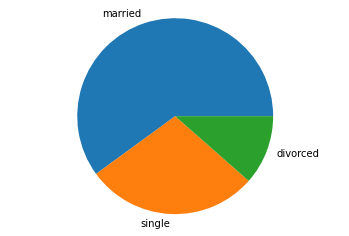

In [52]:
# marital 값의 비율을 계산
marital_nor=bank_df['marital'].value_counts(ascending=False, normalize=True)
print(marital_nor)

# marital의 원 그래프를 작성
plt.pie(marital_nor.values, labels=marital_nor.index)
plt.axis("equal")
plt.show()

no     0.882085
yes    0.117915
Name: y, dtype: float64


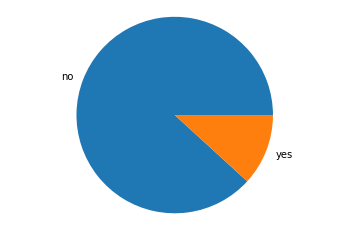

In [53]:
# y의 원 그래프를 작성
y_nor=bank_df['y'].value_counts(ascending=False, normalize=True)
print(y_nor)

plt.pie(y_nor.values, labels=y_nor.index)
plt.axis("equal")
plt.show()

- no가 많은 데이터의 불균형 발생

### 차트 한번에 출력하기

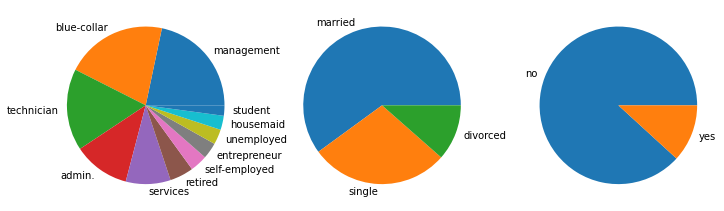

In [58]:
job_nor=bank_df['job'].value_counts(ascending=False, normalize=True)
marital_nor=bank_df['marital'].value_counts(ascending=False, normalize=True)
y_nor=bank_df['y'].value_counts(ascending=False, normalize=True)

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].pie(job_nor.values, labels=job_nor.index)
axs[1].pie(marital_nor.values, labels=marital_nor.index)
axs[2].pie(y_nor.values, labels=y_nor.index)

plt.show()

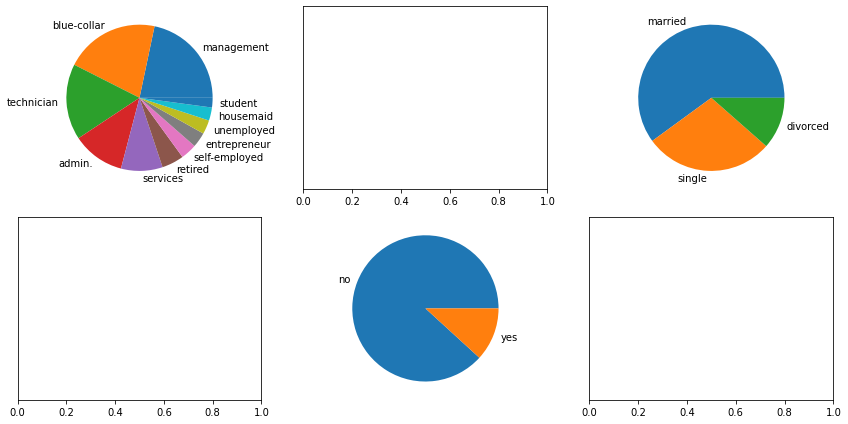

In [66]:
## plt.subplots()
fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharey=True)

# 차트 출력
axs[0][0].pie(job_nor.values, labels=job_nor.index)
axs[0][2].pie(marital_nor.values, labels=marital_nor.index)
axs[1][1].pie(y_nor.values, labels=y_nor.index)
 
# 전체 레이아웃..
fig.tight_layout()

plt.show()

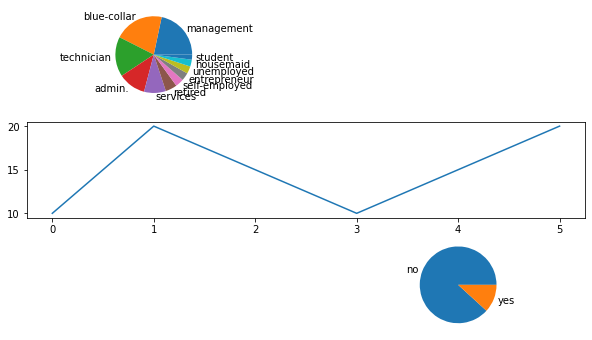

In [78]:
# plt.subplot()

plt.figure(figsize=(10, 6))
plt.subplot(3, 2, 1)
plt.pie(job_nor.values, labels=job_nor.index)

plt.subplot(3, 1, 2)
x=[10, 20, 15, 10, 15, 20]
plt.plot(x)

plt.subplot(3, 2, 6)
plt.pie(y_nor.values, labels=y_nor.index)
plt.show()


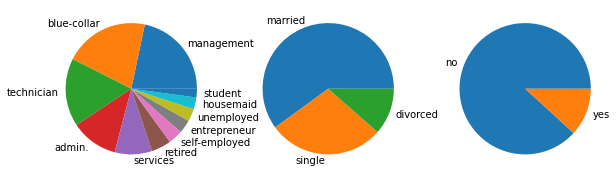

In [76]:
# plt.subplot(행, 열, 순번) / ax1 = plt.add_subplot(행, 열, 순번)

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.pie(job_nor.values, labels=job_nor.index)

plt.subplot(1, 3, 2)
plt.pie(marital_nor.values, labels=marital_nor.index)

plt.subplot(1, 3, 3)
plt.pie(y_nor.values, labels=y_nor.index)
plt.show()

In [65]:
### 재미
from random import *
import time
for i in range(11):
    time.sleep(1)
    print(10-i)
    
print("결과:", randint(1, 15))

10
9
8
7
6
5
4
3
2
1
0
결과: 8


### 5. 데이터 시각화2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
10,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes


9     56
10    41
Name: age, dtype: int64

[9       56
10      41
18      54
34      42
67      55
        ..
7218    63
7225    29
7228    38
7230    28
7233    25
Name: age, Length: 853, dtype: int64, 0       58
1       36
2       25
3       53
4       24
        ..
7226    33
7227    36
7229    25
7231    59
7232    37
Name: age, Length: 6381, dtype: int64]


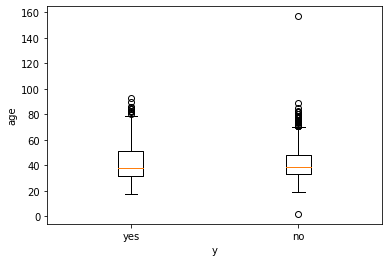

In [95]:
# y가 yes나 no일때의 age데이터를 추출(다른 변수(열)값도 출력 가능)
y_yes = bank_df[bank_df['y'] == 'yes'] 
y_no = bank_df[bank_df['y'] == 'no'] 
display(y_yes.head(2))

# y가 yes나 no일때의 age데이터를 추출(age에 대해서만 사용 가능)
y_yes2 = bank_df.loc[bank_df['y'] == 'yes', 'age']
y_no2 = bank_df.loc[bank_df['y'] == 'no', 'age'] 
display(y_yes2.head(2))

# yes와 no의 데이터를 정리
y_age=[y_yes['age'], y_no['age']]
print(y_age)

# 박스 플롯의 작성
plt.boxplot(y_age)

plt.xlabel("y")
plt.ylabel("age")

ax = plt.gca()
plt.setp(ax, xticklabels=['yes', 'no'])

plt.show()

In [91]:
# yes 데이터
print('yes:', type(y_age[0]))
print('no:', type(y_age[1]))
print('y_age:', type(y_age))

yes: <class 'pandas.core.series.Series'>
no: <class 'pandas.core.series.Series'>
y_age: <class 'list'>


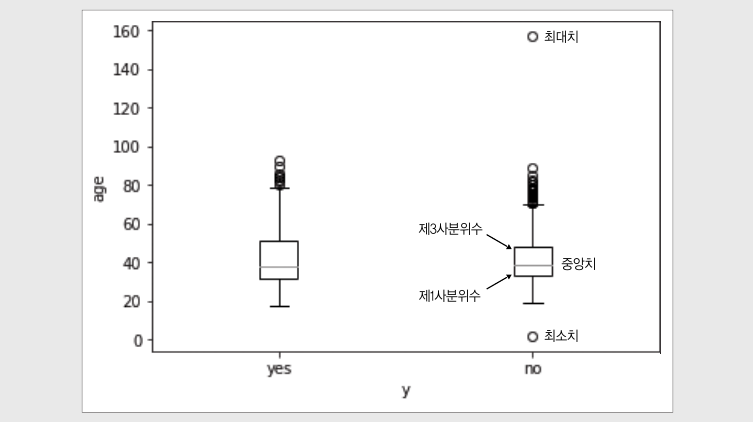

[9         45
10      1270
18       184
34         0
67       387
        ... 
7218    1495
7225     464
7228    2543
7230     159
7233     505
Name: balance, Length: 853, dtype: int64, 0       2143
1        265
2         -7
3         -3
4       -103
        ... 
7226     690
7227     980
7229     199
7231     138
7232    1428
Name: balance, Length: 6381, dtype: int64]


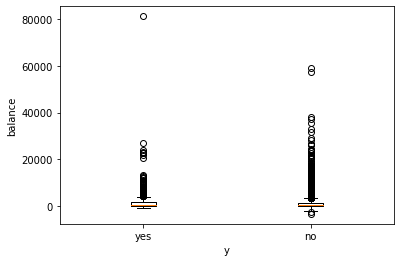

In [97]:
# yes와 no의 데이터를 'balance'
# 위에서 만든 y_yes / y_yes를 이용해  박스플롯의 작성
y_balance=[y_yes['balance'], y_no['balance']]
# print(y_balance)

# 박스 플롯의 작성
plt.boxplot(y_balance)

plt.xlabel("y")
plt.ylabel("balance")

ax = plt.gca()
plt.setp(ax, xticklabels=['yes', 'no'])
#plt.xticks(['yes', 'no'])

plt.show()

### 6. 결측지 처리
- 결측지 제거
- 수치형 데이터 => 평균/중앙값으로 대체, 범주형 => mode 값어로 대체
- 간단한 예측모델을 만들어 대체

In [103]:
# bank_df.isna().sum()
bank_df.isnull().sum()

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [104]:
# 데이터 행/열 갯수 확인(배열 구조)
print(bank_df.shape)

(7234, 17)


In [109]:
bank_df_tmp=bank_df.dropna(how='any')   # nan이  1개라도 있는 데이터 행 삭제
print(f'how=any: {bank_df_tmp.shape}')  # 행 전체가 nan 인 데이터 행 삭제

bank_df_tmp=bank_df.dropna(how='all')
print(f'how=all: {bank_df_tmp.shape}')

# job、education에서 결손값이 포함되어 있는 행을 삭제
bank_df = bank_df.dropna(subset=["job" , "education"])
print(f'subset사용: {bank_df.shape}')

how=any: (1273, 17)
how=all: (7234, 17)
subset사용: (6935, 17)


In [110]:
bank_df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      1925
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5648
y               0
dtype: int64

In [112]:
# 결손값(결측지/NaN)이 2400개 이상인 열을 제외

bank_df=bank_df.dropna(thresh=2400, axis=1)
print(f'thresh 조건 사용: {bank_df.shape}')
print(bank_df.isnull().sum())

thresh 조건 사용: (6935, 16)
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      1925
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64


### 결손값 대체

In [118]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

In [117]:
display(bank_df.head(3))

# 결손값을 「unknown」으로 치환
bank_df_tmp = bank_df.fillna("unknown")   # bank_df 데이터의 모든 NaN 값을 'unknown'으로 변경
display(bank_df_tmp.head())

# 특정 변수(열)를 기준으로 NaN 값 변경
bank_df = bank_df.fillna({"contact":"unknown"})
display(bank_df.head())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


### 특이값(이상치)의 처리
- 표준점수로 변환후 -3 이하 및 +3 이상값 제거 방식
- IQR 방식
- 도메인 지식이용/Binning 처리 방식

표준점수 이용 방법
- 평균:0, 표준편차: 1 인 분포로 변환후 +3 이상/-3 이하 제거
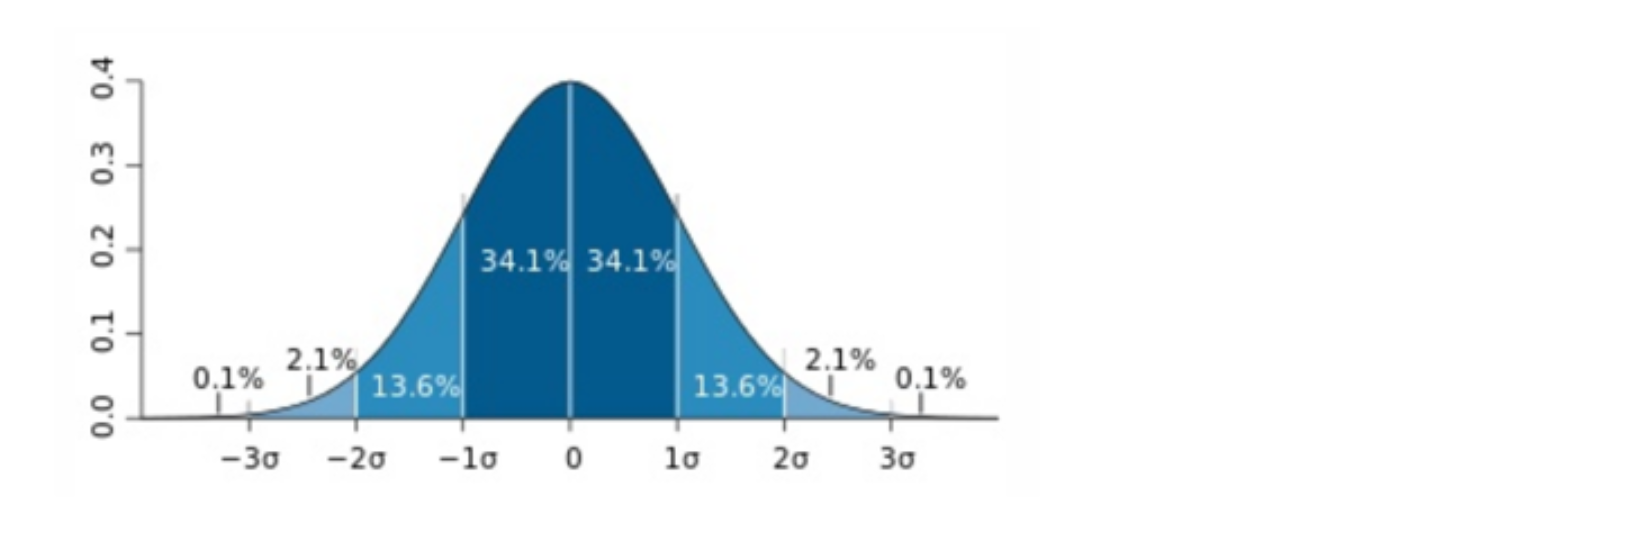

In [119]:
# age가 18세이상 100세미만이 아닌행을 삭제

# bank_df = bank_df[bank_df['age'] >= 18]
# bank_df = bank_df[bank_df['age'] <=100]

bank_df = bank_df[(bank_df['age'] >= 18) & (bank_df['age'] <=100)]

print(bank_df.shape)

(6933, 16)


IQR 방식
- IQR이란, Interquartile range의 약자로써 Q3 - Q1를 의미한다.
- Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이

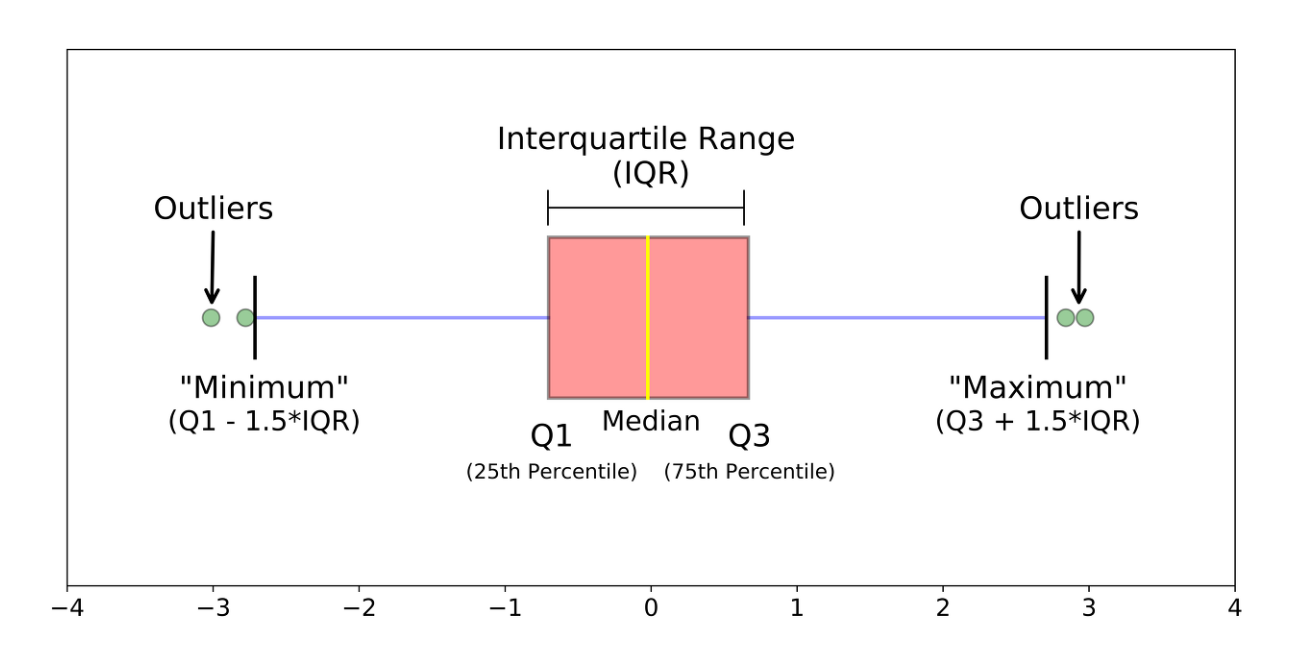

In [123]:
Q1=bank_df['age'].describe()["25%"]   # Q1 은 1/4, 즉 백분위로 계산시 25%
Q3=bank_df['age'].describe()["75%"]   # Q3 은 3/4, 즉 백분위로 계산시 75%
Q2=bank_df['age'].describe()["50%"]   # 중앙값, 즉 백분위로 계산시 50%

IQR = Q3 - Q1    # 4분위 범위값
print(f'Q1:{Q1}, Q2(중앙값):{Q2}, Q3:{Q3}, IQR:{IQR}')

Q1:32.0, Q2(중앙값):38.0, Q3:48.0, IQR:16.0


In [125]:
max_num=Q3 + 1.5 * IQR
min_num=Q1 - 1.5 * IQR

print(f'max_num={max_num}, min_num={min_num}')

max_num=72.0, min_num=8.0


In [126]:
bank_df_tmp = bank_df[(bank_df['age'] >= min_num) & (bank_df['age'] <= max_num)]

print(bank_df_tmp.shape)

(6877, 16)


### 문자열을 수치로 변환

In [135]:
display(bank_df_tmp.head(3))

# "y" 필드의 yes를 1、no를 0으로 치환
bank_df_tmp['y'] = bank_df_tmp['y'].replace('yes', 1)
bank_df_tmp['y'] = bank_df_tmp['y'].replace('no', 0)

display(bank_df_tmp.head(3))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,0


C:\Users\user01\AppData\Local\Temp/ipykernel_9400/347862369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_tmp['y'] = bank_df_tmp['y'].replace('yes', 1)
C:\Users\user01\AppData\Local\Temp/ipykernel_9400/347862369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_tmp['y'] = bank_df_tmp['y'].replace('no', 0)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,0


In [136]:
# 모든  yes를 1、no를 0으로 치환
bank_df_tmp = bank_df_tmp.replace('yes', 1)
bank_df_tmp = bank_df_tmp.replace('no', 0)

display(bank_df_tmp.head(3))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0


### 다수의 문자(다수항목)를 숫자로 변환
- 범주형 데이터에 대한 숫자형 변환(머신러닝의 회기분석 등은 문자를 사용할 수 없음)
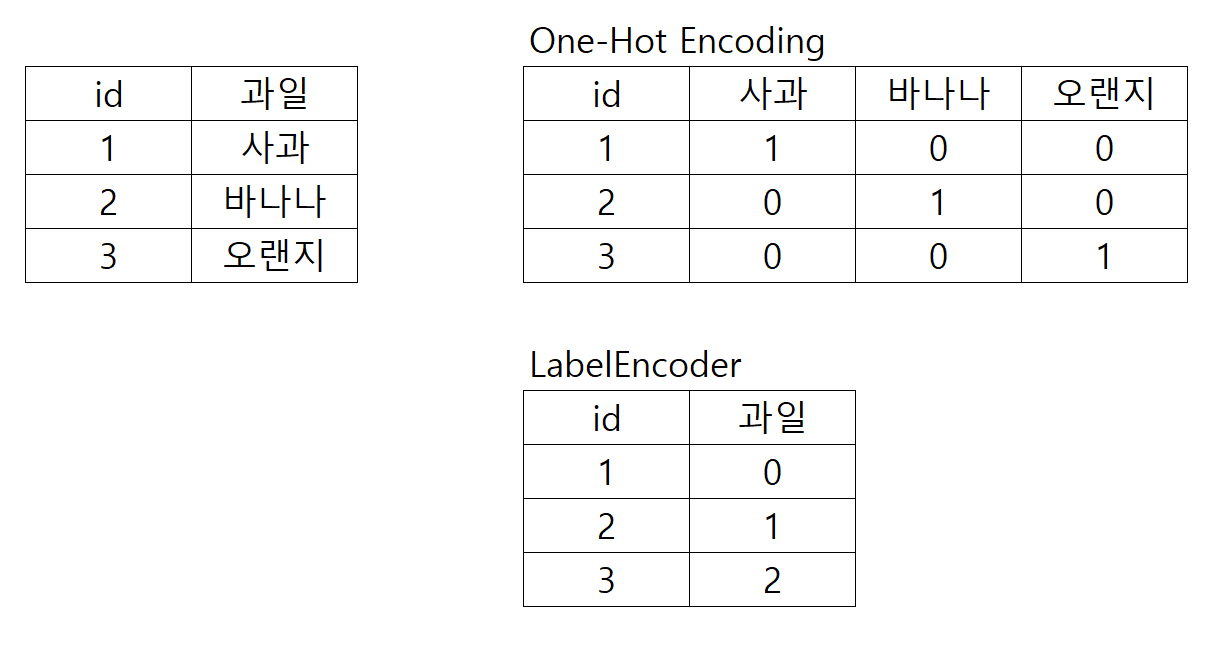

In [138]:
# job을 dummies() 
bank_df_job = pd.get_dummies(bank_df_tmp['job'])
bank_df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


- job 이외의 데이터형이 문자열인 항목에 대하여 더미 변수화 하기

In [139]:
bank_df_tmp.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y             int64
dtype: object

In [141]:
# marital을 더미 변수로 변경
bank_df_job = pd.get_dummies(bank_df_tmp['job'])
bank_df_marital = pd.get_dummies(bank_df_tmp['marital'])
bank_df_educationb = pd.get_dummies(bank_df_tmp['education'])
bank_df_contact = pd.get_dummies(bank_df_tmp['contact'])
bank_df_month = pd.get_dummies(bank_df_tmp['month'])

bank_df_month.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [147]:
# 원래의 데이터 세트에서 수치항목을 추출
dt_df=bank_df_tmp.dtypes
print(type(dt_df))
# print(dt_df)

col_lst=[]
for ind, val in zip(dt_df.index, dt_df.values):
    if val == "int64":
        col_lst.append(ind)
print(col_lst)

tmp_df=bank_df_tmp[col_lst]
display(tmp_df.head())

<class 'pandas.core.series.Series'>
['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [149]:
# 수평(열)결합
print(tmp_df.shape)
tmp_df1=pd.concat([tmp_df, bank_df_job, bank_df_marital, bank_df_educationb,
                   bank_df_contact, bank_df_month], axis=1) # 열 겹합시 index 값을 기준
display(tmp_df1.head())
print(tmp_df1.shape)

(6877, 11)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


(6877, 43)


In [150]:
bank_df_tmp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0
3,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,0
4,24,technician,single,secondary,0,-103,1,1,unknown,5,may,145,1,-1,0,0


In [153]:
tmp_df_skl = bank_df_tmp.copy()
tmp_df_skl.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0


In [156]:
#!pip install sklearn

In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(tmp_df_skl['job'])
tmp_df_skl['job'] = le.transform(tmp_df_skl['job'])

tmp_df_skl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,9,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,1,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0
3,53,9,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,0
4,24,9,single,secondary,0,-103,1,1,unknown,5,may,145,1,-1,0,0


In [159]:
bank_df_tmp['job'].unique()

array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       'housemaid'], dtype=object)

In [33]:
# 전처리한 결과를 CSV파일로 출력
